Импорт библиотек (cv2, numpy)

In [25]:
from lab3.pyimagesearch.transform import four_point_transform
from lab3.pyimagesearch import imutils
from skimage.filters import threshold_adaptive
import numpy as np
import cv2
# to make it work in notebook
import matplotlib.pyplot as plt 
%matplotlib inline

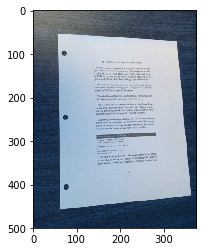

In [8]:
# загрузка и преобразование изображения
image = cv2.imread('lab3/images/page.jpg')
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
plt.imshow(image)
plt.show()

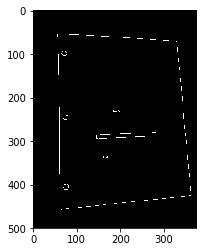

In [12]:
# преобразование изображения в ч/б и поиск ребер
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
plt.imshow(edged, cmap='gray')
plt.show()

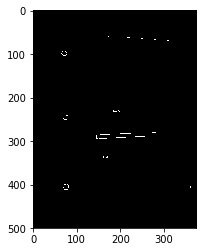

In [18]:
# поиск контуров
image, contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image, cmap='gray')
plt.show()

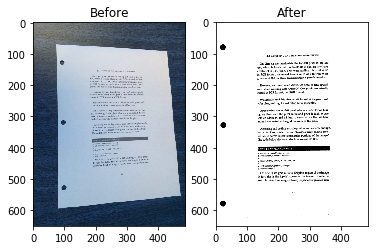

In [24]:
# применение контуров и конвертация цвета
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = threshold_adaptive(warped, 251, offset = 10)
warped = warped.astype("uint8") * 255
fig = plt.figure()
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(imutils.resize(orig, height = 650), cmap='gray')
a.set_title('Before')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(imutils.resize(warped, height = 650), cmap='gray')
a.set_title('After')
plt.show()